In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


**there are no duplicate values in the data set**

In [8]:
df.isnull()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


**Insights :**

* From the above description of numerical data , all means are very close to each other- b/w 66 and 68.05
* all standard deviations are also close- betweeen 14.6 and 15.19
* while there is a min score 0 for math, for writing min. is much higher = 10 and for reading myght higher =17





In [12]:
print("categories in 'gender' variable : ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable : ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable : ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable : ",end=" ")
print(df['lunch'].unique())

categories in 'gender' variable :  ['female' 'male']
categories in 'race_ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable :  ['standard' 'free/reduced']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='object']


print('we have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features:{}'.format(len(categorical_feature),categorical_feature))

we have 3 numerical features:['math_score', 'reading_score', 'writing_score']

we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [17]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [20]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [21]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing : 3
Number of students with less than 20 marks in Reading: 1


**Insights**

* From the above values er get the students have performed the worst in maths
* And also found that best performance in reding section



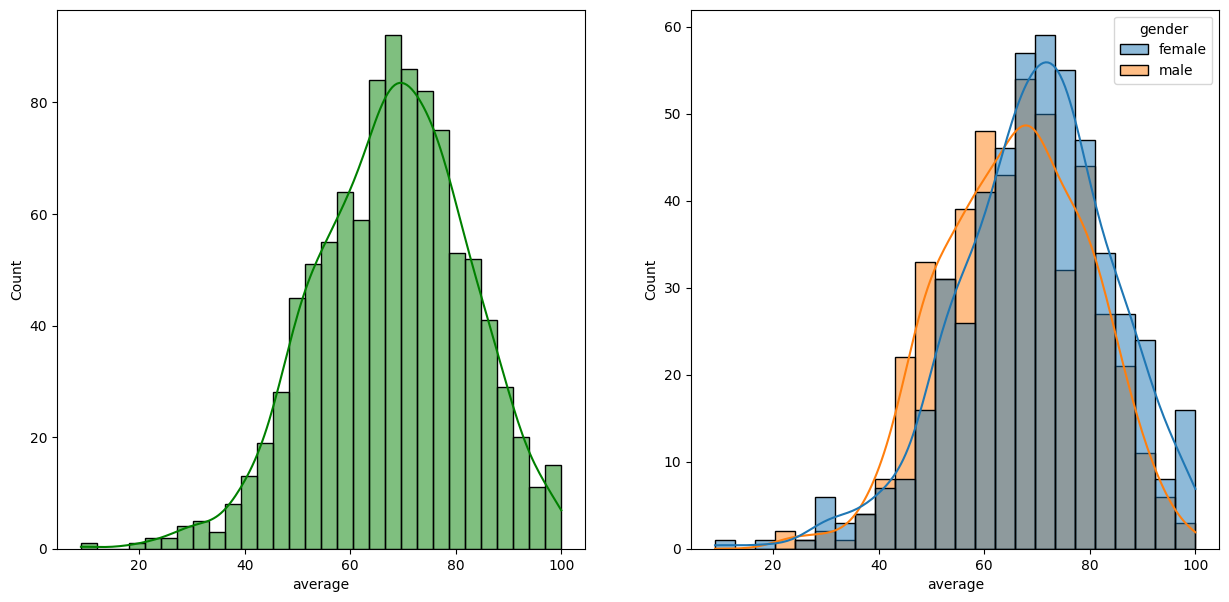

In [22]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axis[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axis[1])
plt.show()


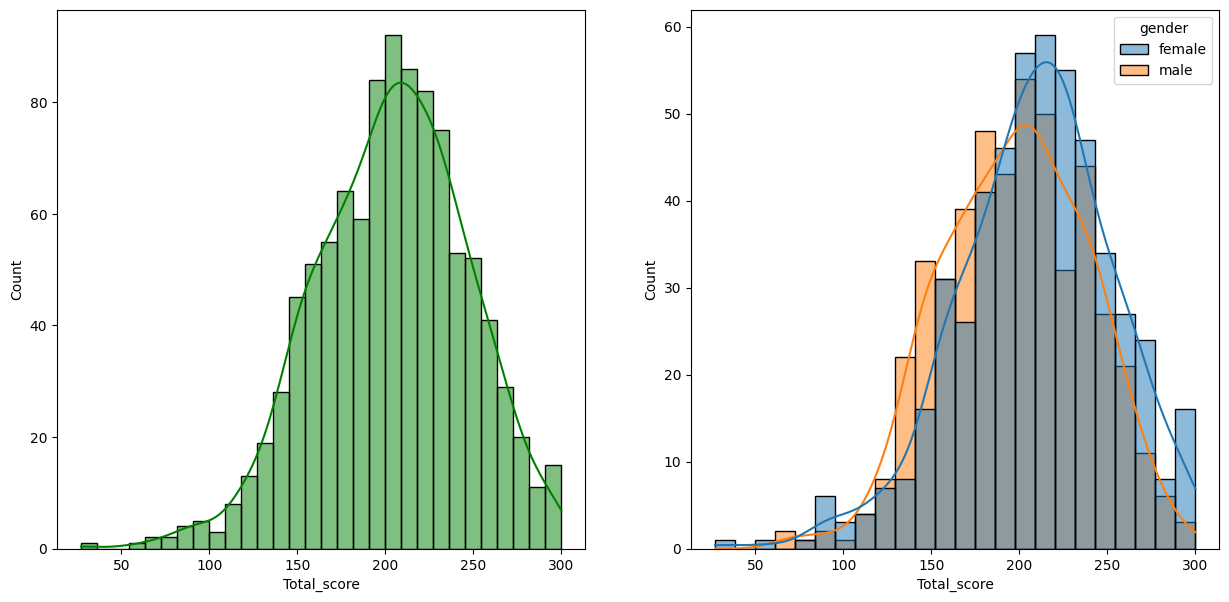

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='Total_score', bins=30, kde=True, color='g', ax=axis[0])
sns.histplot(data=df, x='Total_score', kde=True, hue='gender', ax=axis[1])
plt.show()




* Female students tend to perform well than the male students




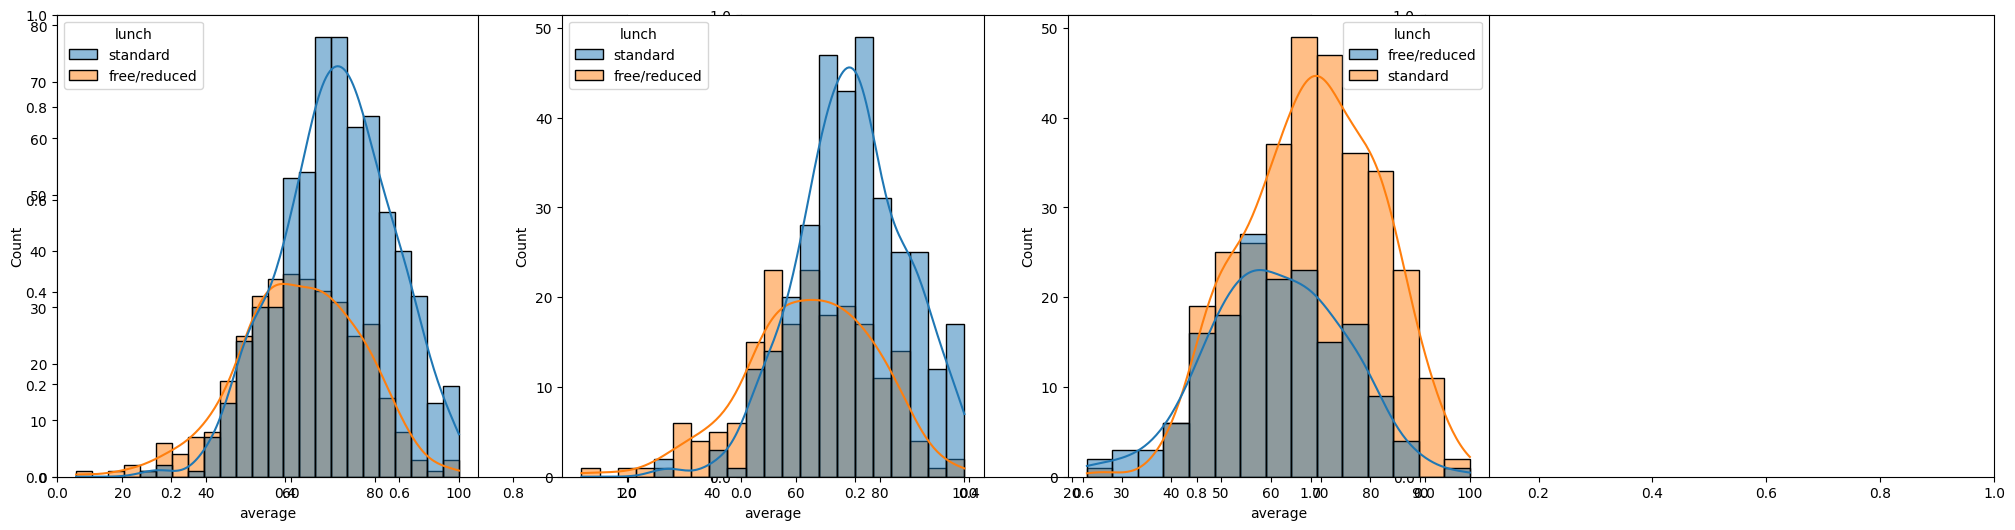

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(x='average',data=df, hue = 'lunch', kde =True)
plt.subplot(142)
sns.histplot(x='average',hue='lunch',kde =True,data=df[df.gender=='female'])
plt.subplot(143)
sns.histplot(x='average',kde =True, hue='lunch',data=df[df.gender=='male'])
plt.show()

**Insigts**


* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be  it a male or female




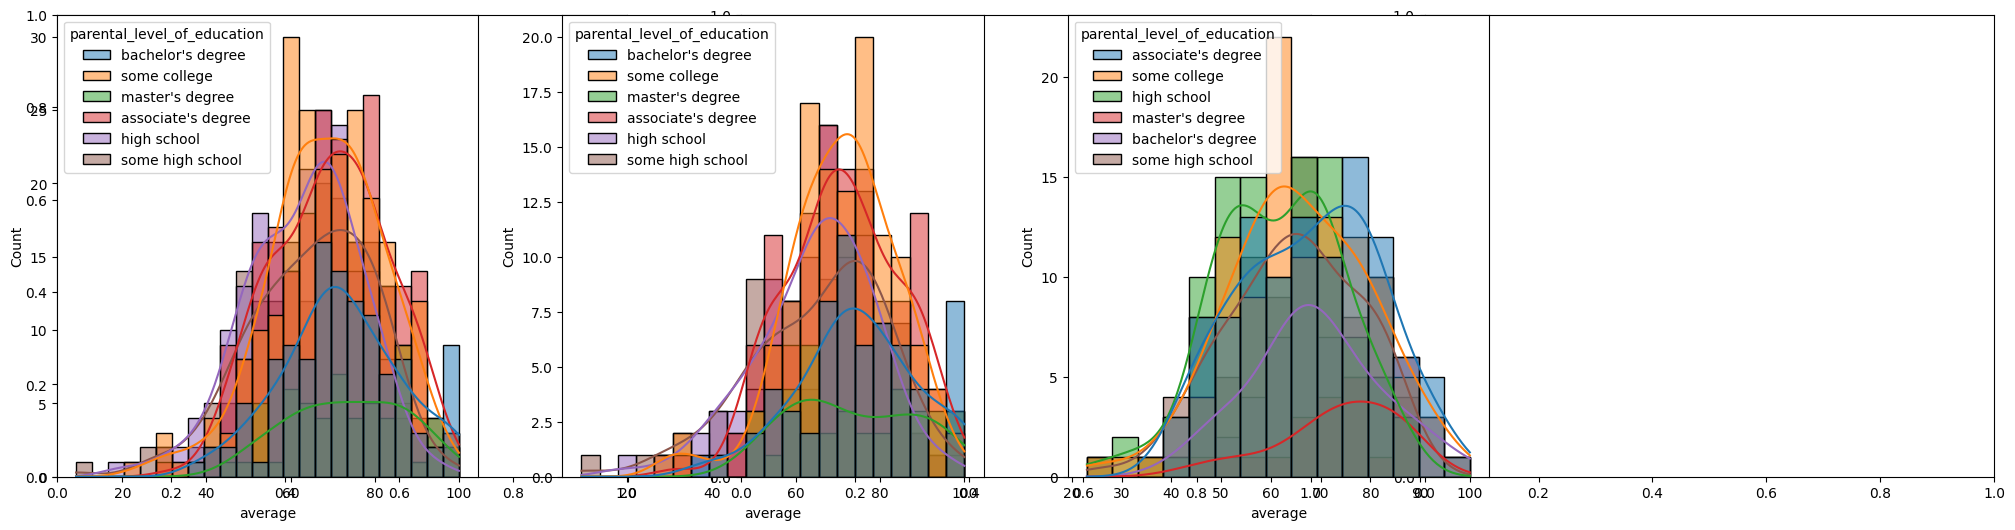

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(x='average',data=df, hue = 'parental_level_of_education', kde =True)
plt.subplot(142)
sns.histplot(x='average',hue='parental_level_of_education',kde =True,data=df[df.gender=='female'])
plt.subplot(143)
sns.histplot(x='average',kde =True, hue='parental_level_of_education',data=df[df.gender=='male'])
plt.show()

**insights**


*In general parents education dont help student perform well in exam
* 2nd plot shows  that parets whose education is of associate degree or masetrs degree their male child exam
* 3rd plot we can see there is no effect of parents eduication on females students





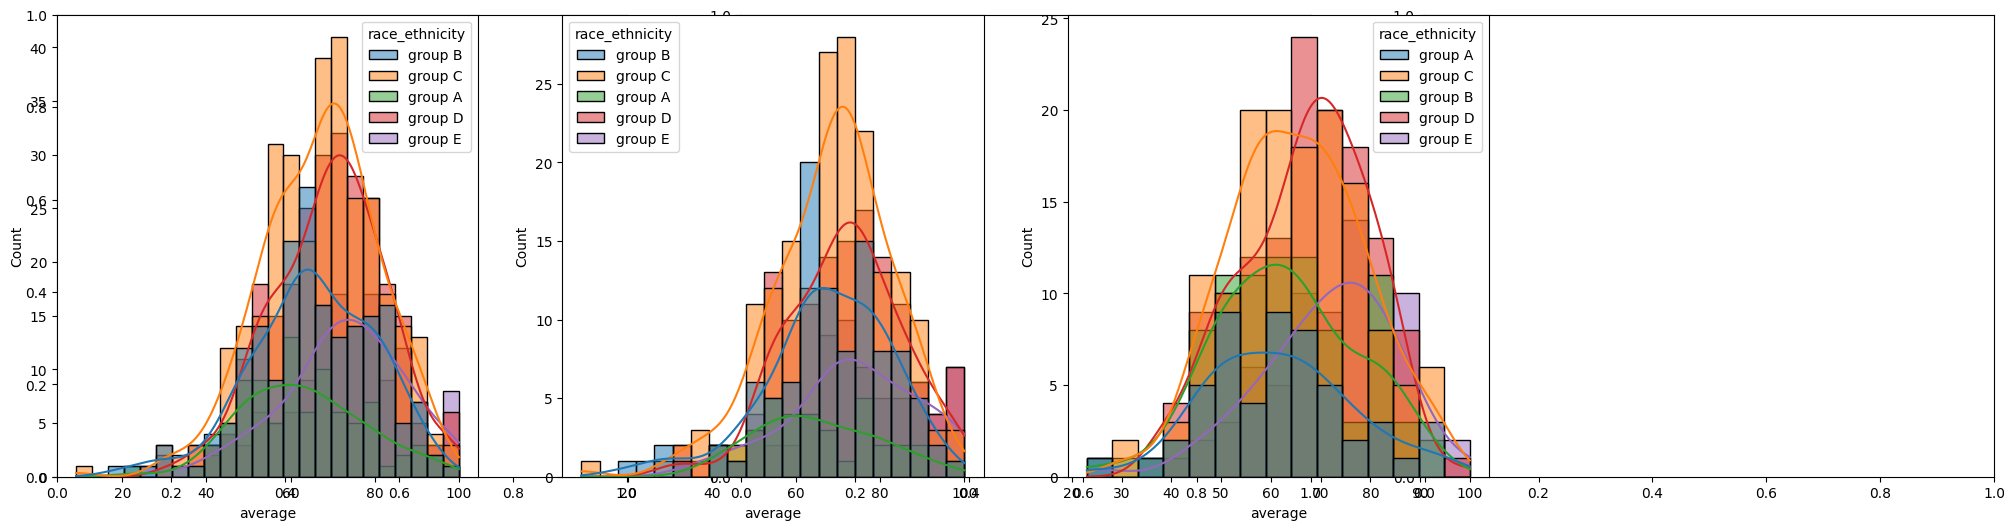

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(x='average',data=df, hue = 'race_ethnicity', kde =True)
plt.subplot(142)
sns.histplot(x='average',hue='race_ethnicity',kde =True,data=df[df.gender=='female'])
plt.subplot(143)
sns.histplot(x='average',kde =True, hue='race_ethnicity',data=df[df.gender=='male'])
plt.show()

**insights**

* Students of group A and group B tends to perform poorlty in exam
* Students of group A and group B tends to perform poorlty in exam ireespective of male or female




**Maximum score of studnets in all the three subjects**

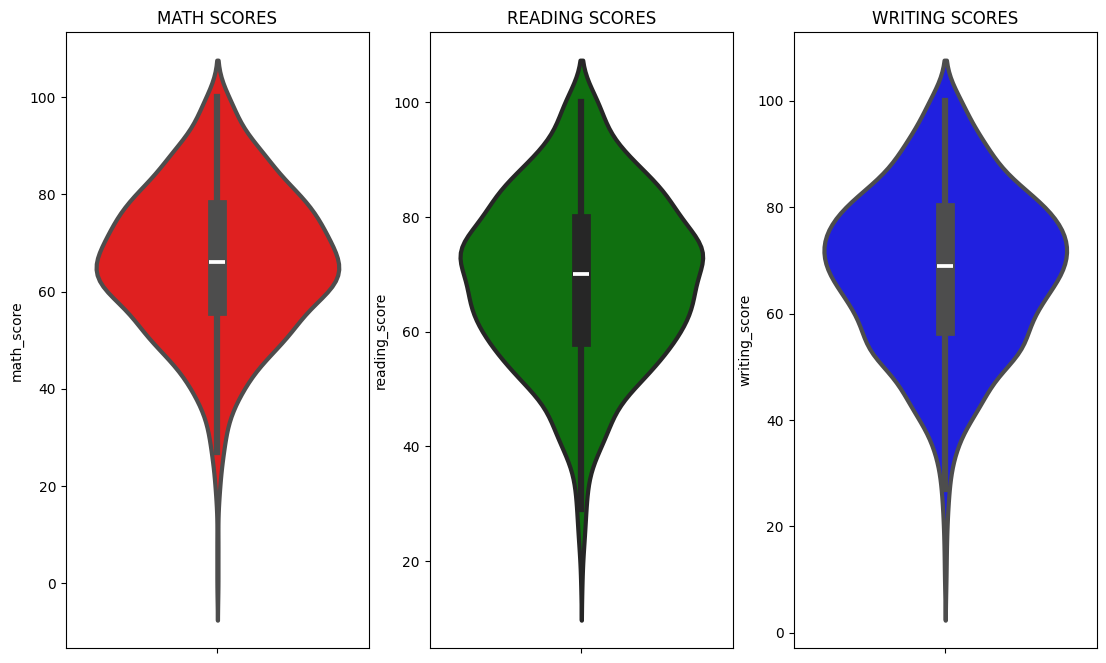

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**insights**

* from the above 3 plots it is claearly visible that most of the Students score in between 60-80 in maths whereas in reading and wiritng most of them score from 50-80




**MULTIVARIATE ANALYSIS USING PIEPLOT**

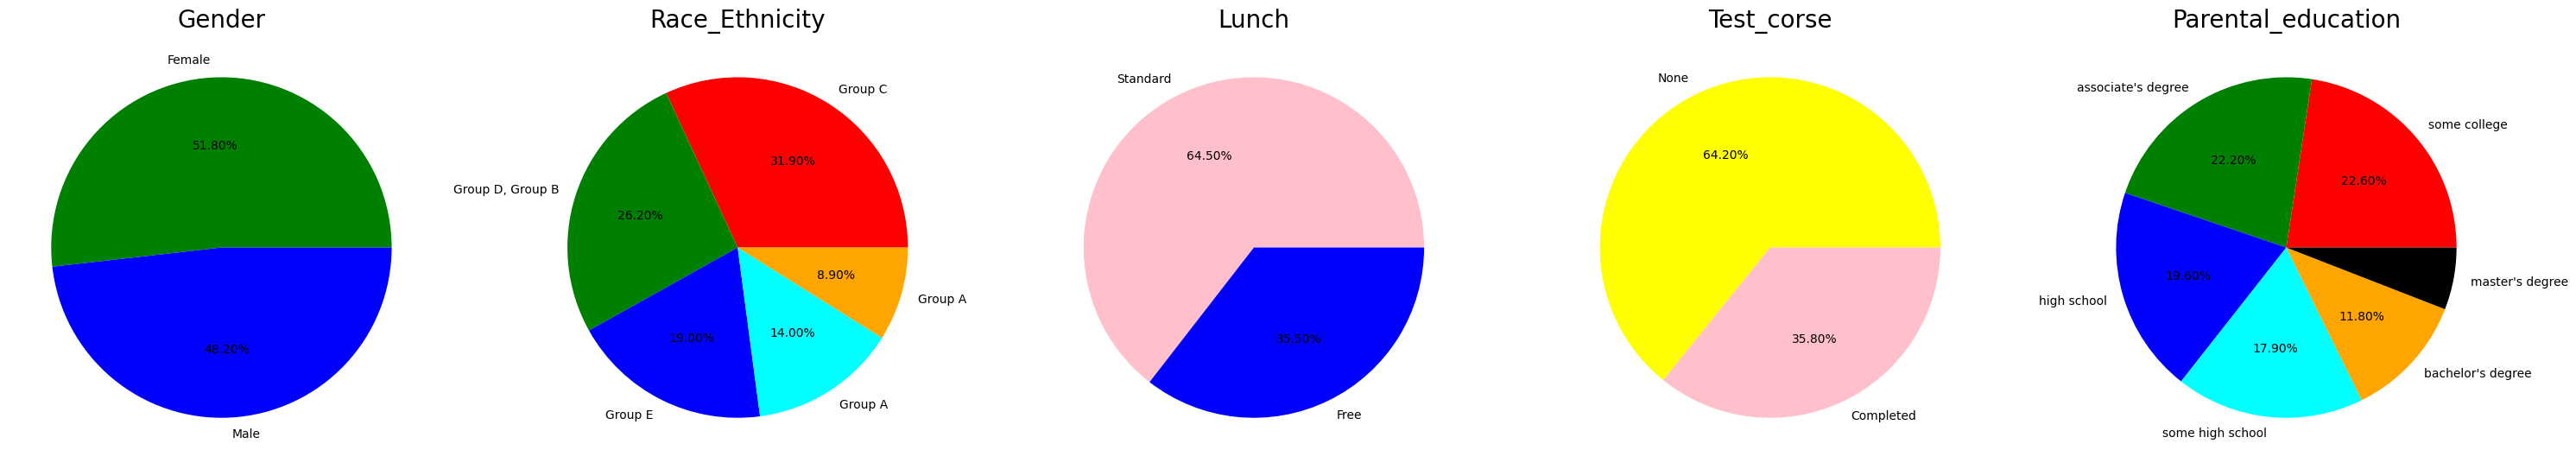

In [28]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['green','blue']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C','Group D, Group B','Group E','Group A','Group A']
color= ['red' , 'green' , 'blue' , 'cyan' , 'orange']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Race_Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = [ 'Standard', 'Free']
color = ['pink','blue']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = [ 'None', 'Completed']
color = ['yellow','pink']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Test_corse',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
color = ['red','green','blue','cyan','orange','black','pink']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Parental_education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()



In [29]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


**Insights**

* Number of male and female students are almost equal
* Number of students greatest in group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in nay test preparation course is greater
* Number of students whose parental education is "some sollege" is greater followed closely by "associate degree"








**FEATURE WISE SELECTION**

Gender column

Uni variate analysis

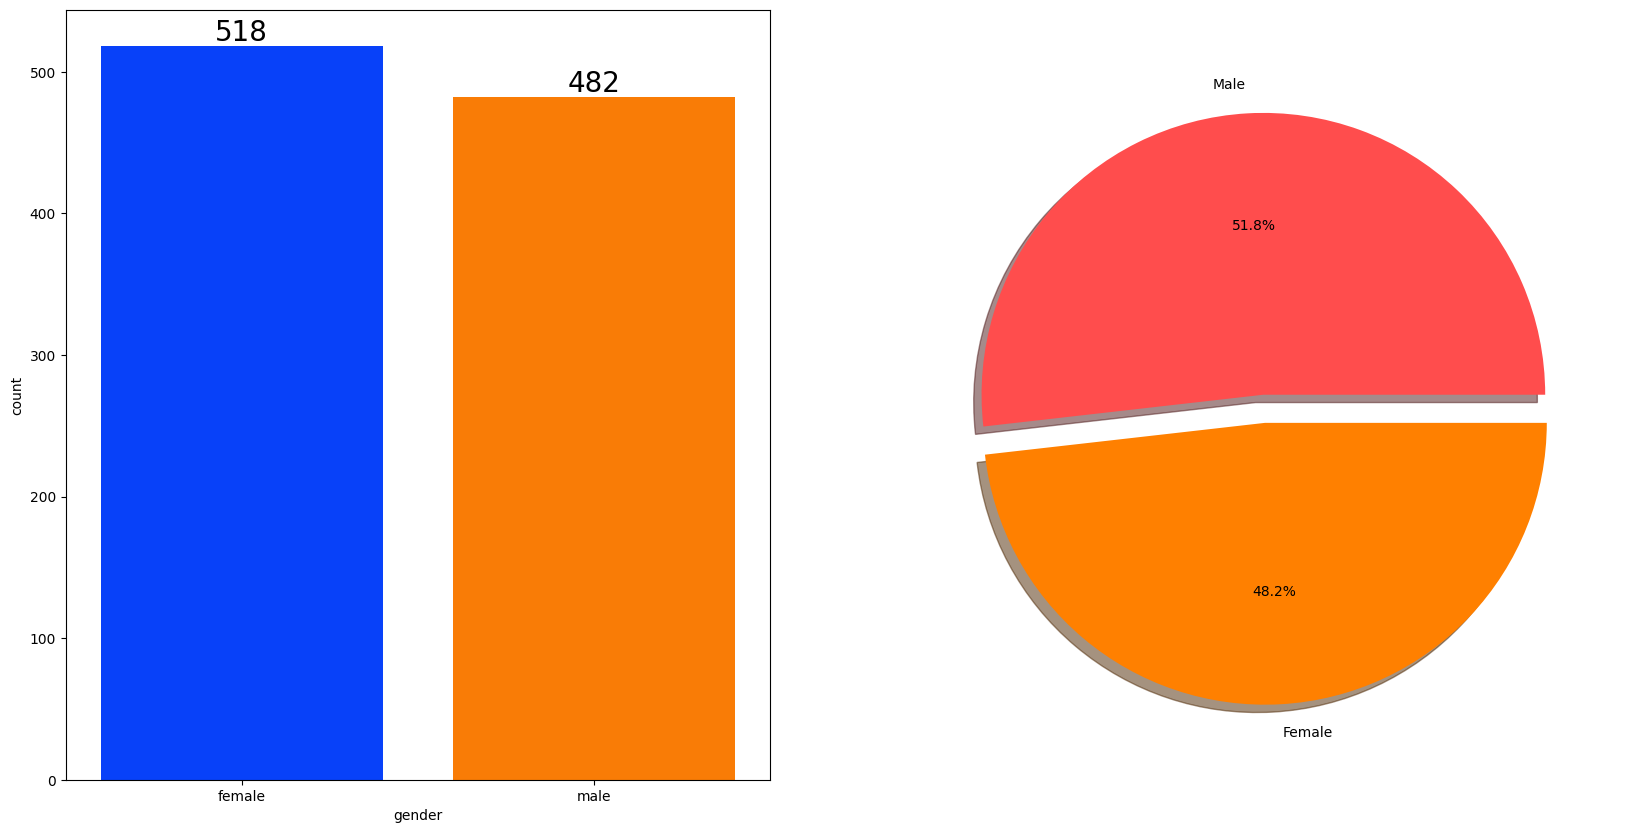

In [30]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,ax=ax[0], palette = 'bright', saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)

plt.pie(x=df['gender'].value_counts(), labels =['Male', 'Female'],  explode = [0,0.1], autopct = '%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()




**Insights**
* Gender has balanced data with female students are 518(48%) and male students are(52%).

**Bivariate analysis( is gender has any impact on students performance)**

In [33]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
print(gender_group)


        math_score  reading_score  writing_score  Total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


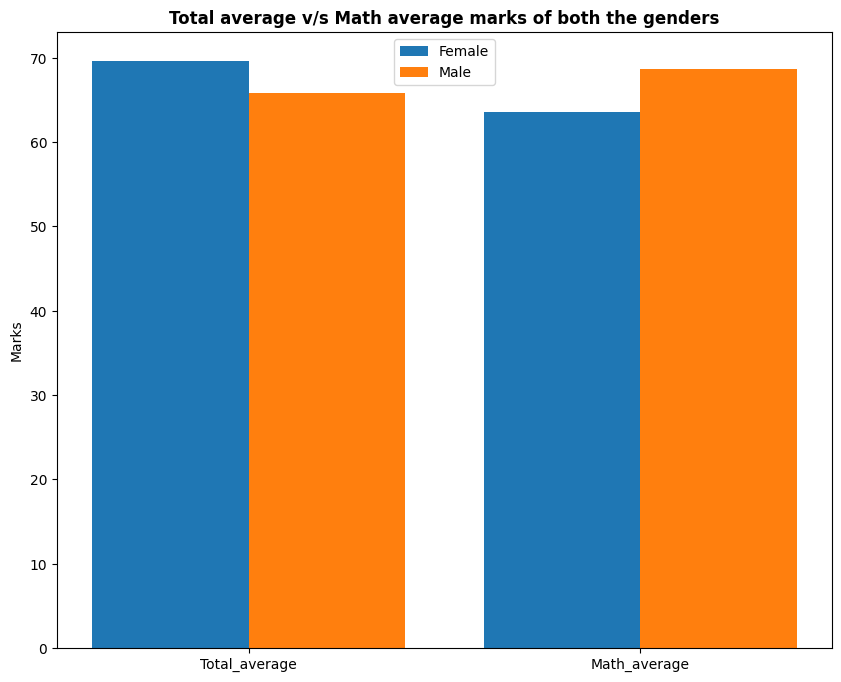

In [37]:

x = ['Total_average', 'Math_average']

female_scores = [gender_group['average'].iloc[0], gender_group['math_score'].iloc[0]]
male_scores   = [gender_group['average'].iloc[1], gender_group['math_score'].iloc[1]]

x_axis = np.arange(len(x))

plt.figure(figsize=(10,8))
plt.bar(x_axis - 0.2, female_scores, 0.4, label='Female')
plt.bar(x_axis + 0.2, male_scores, 0.4, label='Male')

plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()


**Insights**


* On an avg females have a better overall score then men




**Univariate Analysis**

how is group wise distribution?

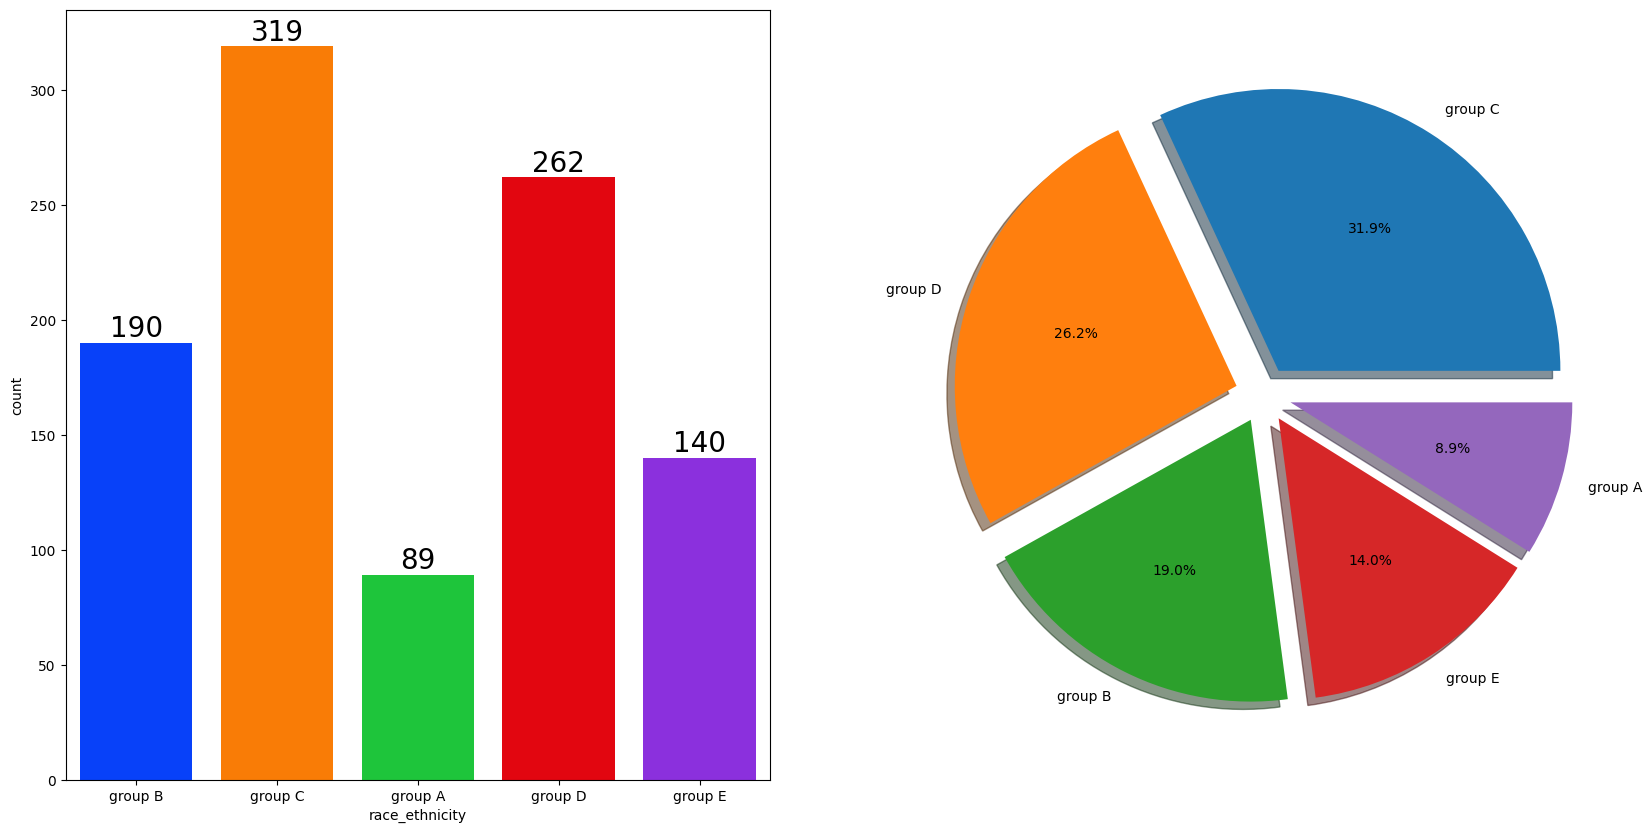

In [38]:
f, ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0], palette = 'bright', saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)
plt.pie(x=df['race_ethnicity'].value_counts(), labels =df['race_ethnicity'].value_counts().index,  explode = [0.1,0.1,0.1,0.1,0.1], autopct = '%1.1f%%',shadow=True)
plt.show()

**Insights**




* Most of the student belonging from group c/group d
* lowest number of students belong to group A.






**Bivariate Analysis**

( is race_ethnicity has any impact on students performance?)

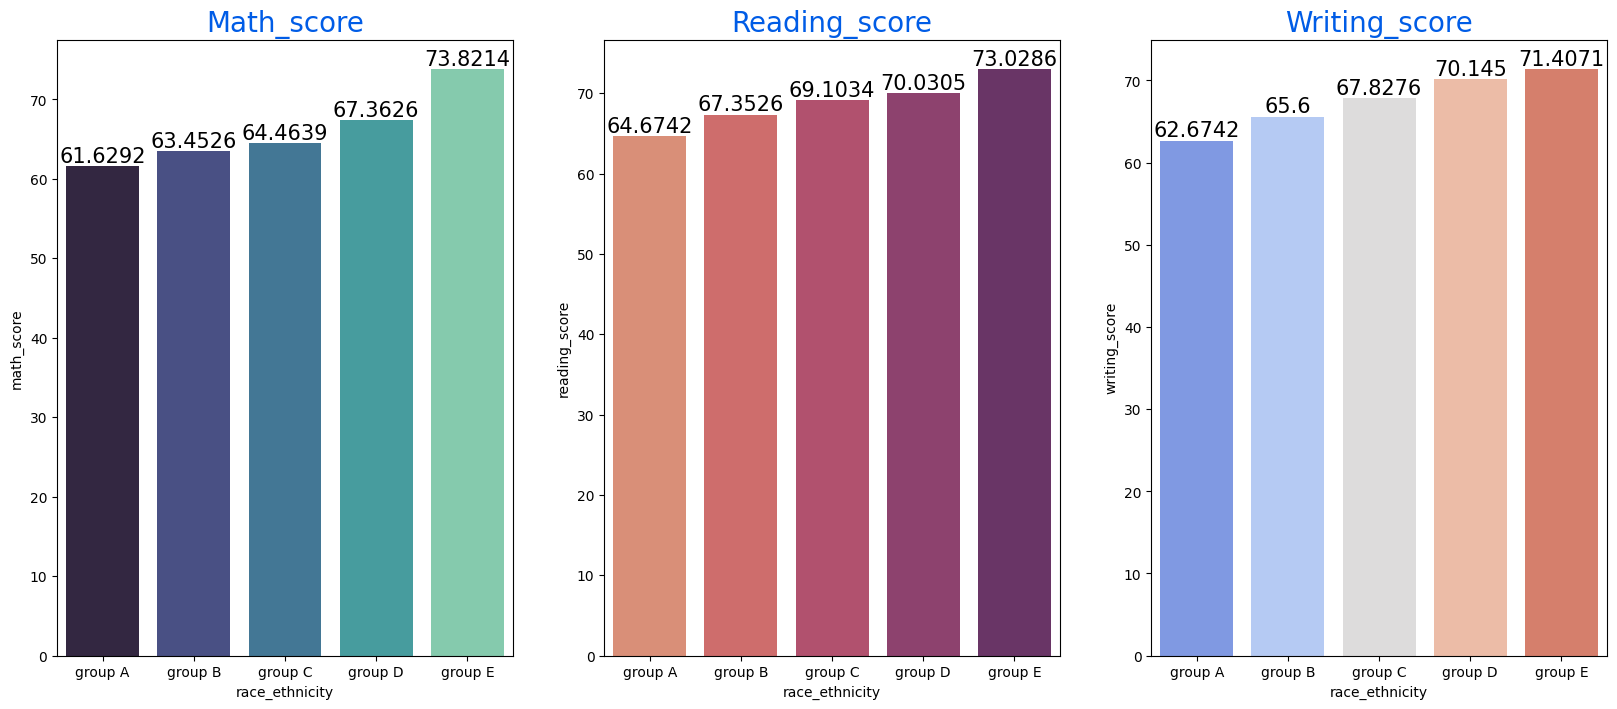

In [40]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

math_means = Group_data2['math_score'].mean().reset_index()
sns.barplot(x='race_ethnicity', y='math_score', data=math_means, palette='mako', ax=ax[0])
ax[0].set_title('Math_score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)


reading_means = Group_data2['reading_score'].mean().reset_index()
sns.barplot(x='race_ethnicity', y='reading_score', data=reading_means, palette='flare', ax=ax[1])
ax[1].set_title('Reading_score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)


writing_means = Group_data2['writing_score'].mean().reset_index()
sns.barplot(x='race_ethnicity', y='writing_score', data=writing_means, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing_score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


**Insights**

* Group E students have scored the highest marks
* Group A students have scored the lowest marks
* Students from a lower socioeconmic status have a lower avg in all course subjects

**PARENTAL LEVEL OF EDUCATION COLUMN**

* what is the educational backgroud of studenst parent?
* is parental eduaction has any impact on students performance?





** UNIVARIATE ANALYSIS** (what is the educational backgroud of student's parent?)


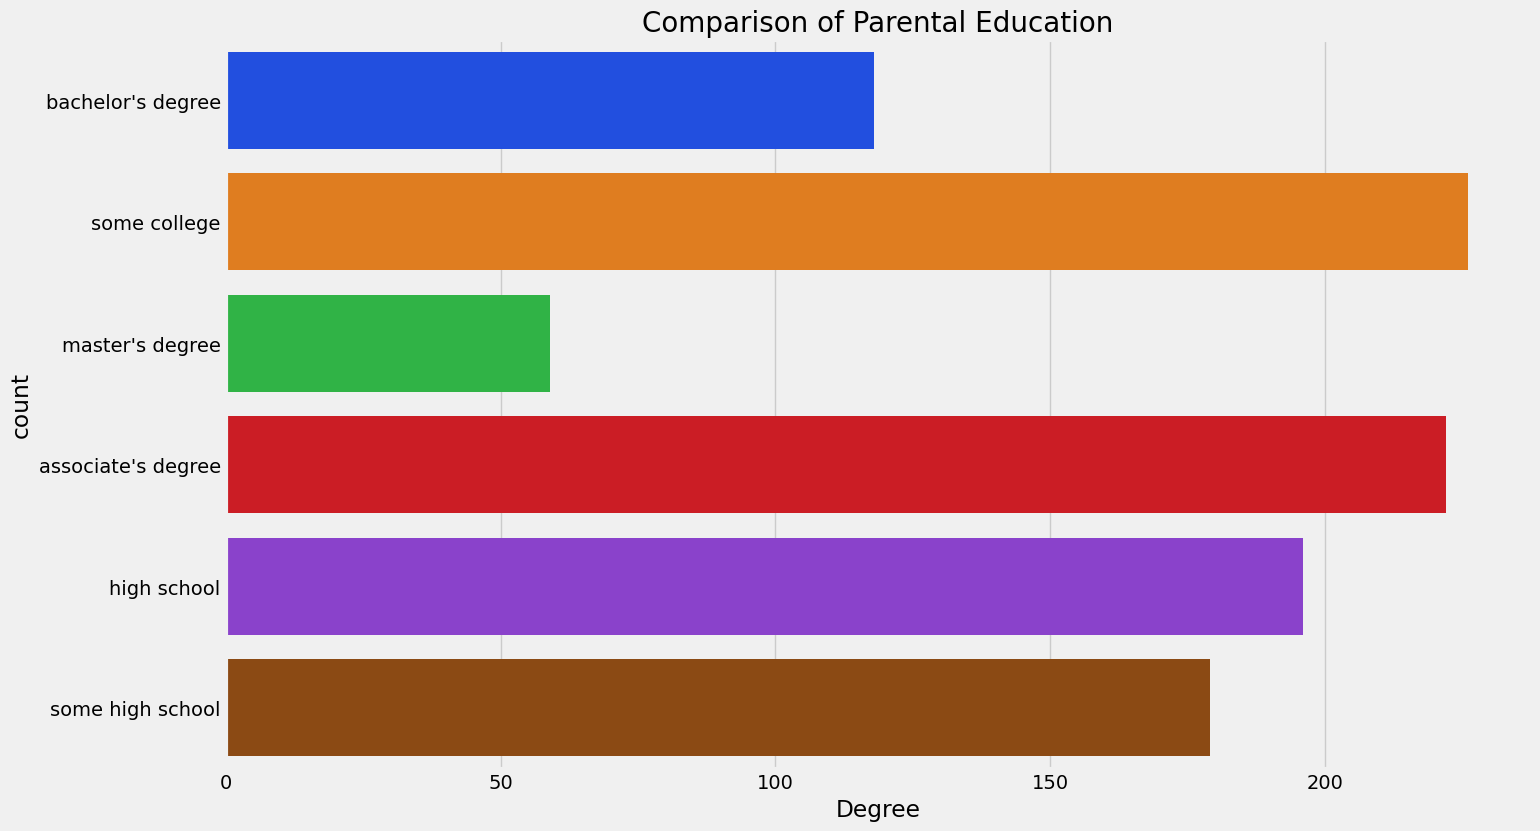

In [42]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='bright')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**

* large no. of parents are from the some college

**BIVARIATE ANALYSIS**

( is parental education has any impact on students performance?)

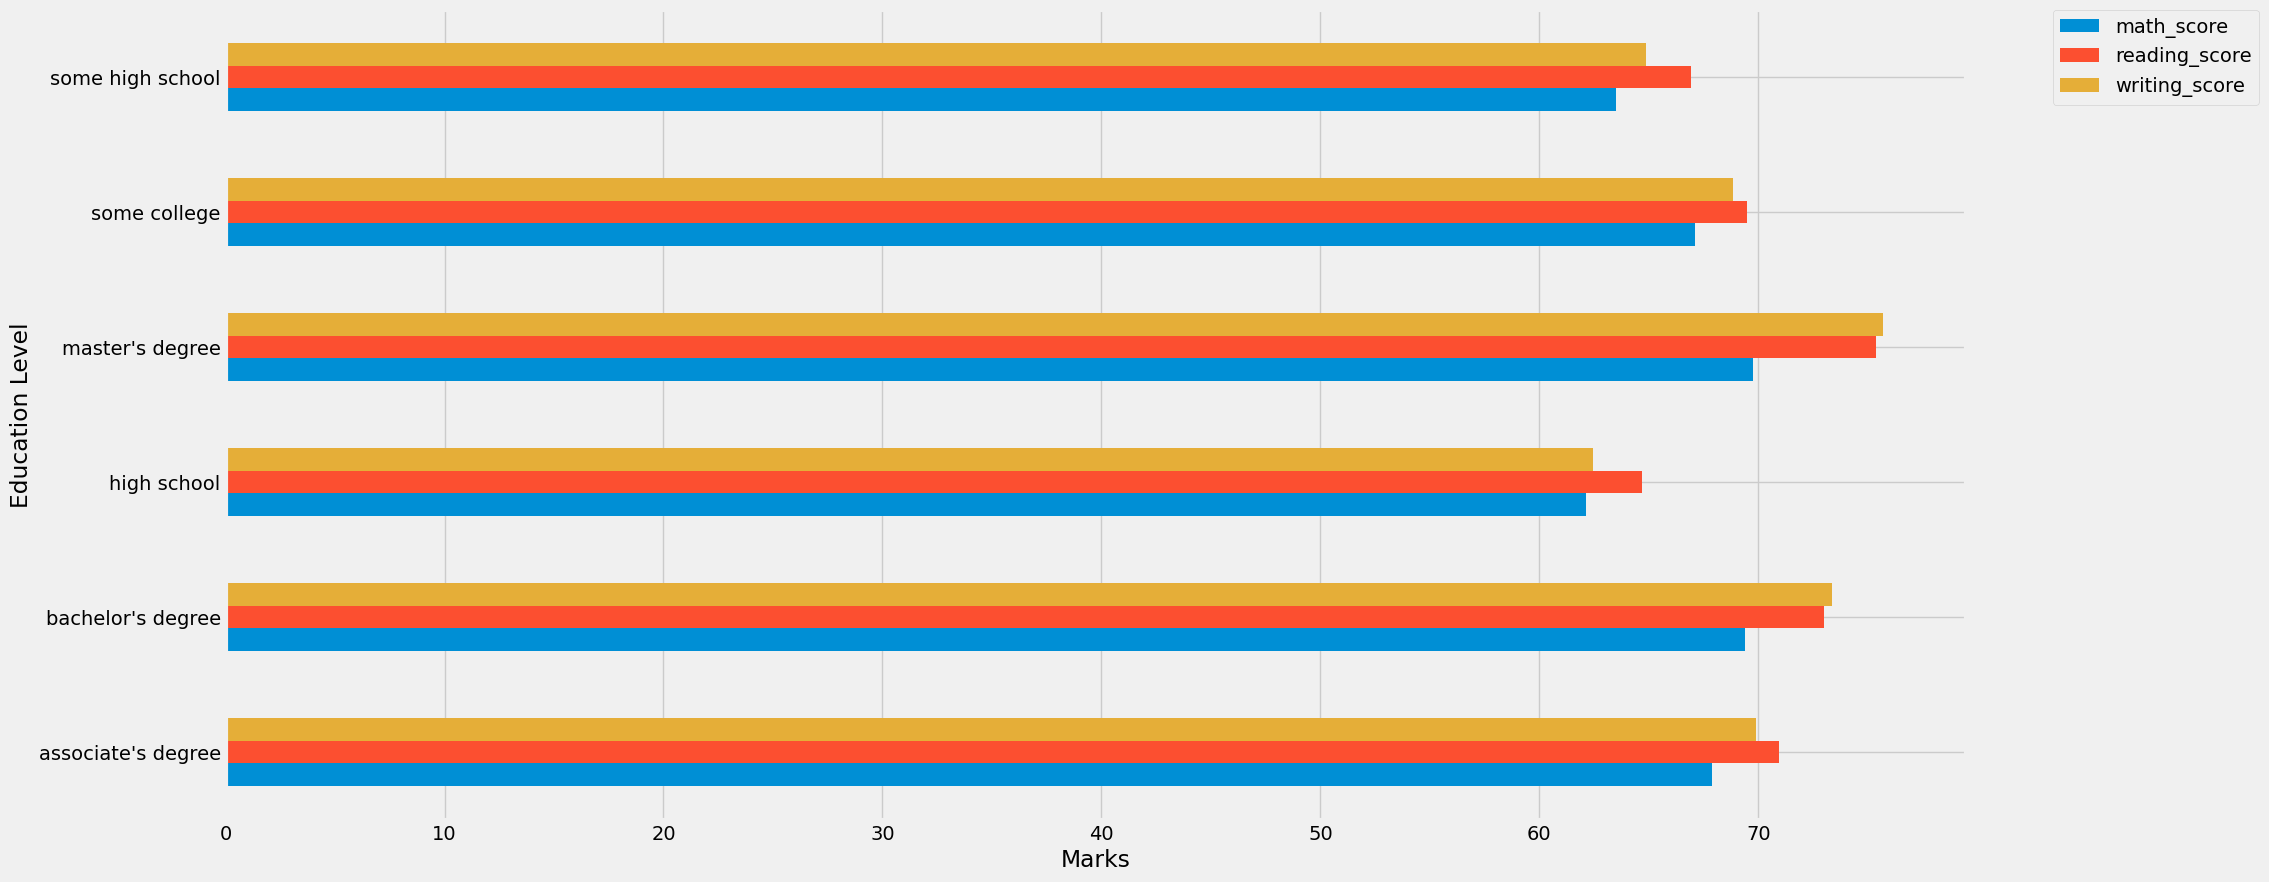

In [44]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().plot(
    kind='barh', figsize=(20, 10)
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Marks')
plt.ylabel('Education Level')
plt.show()


**LUNCH COLUMN**



* which type of lunch is most among the students?

* what is the effect of lunch type om test results?

**UNIVARIATE ANALYSIS**

(which type of lunch is most among the students?)

Text(0, 0.5, 'Count')

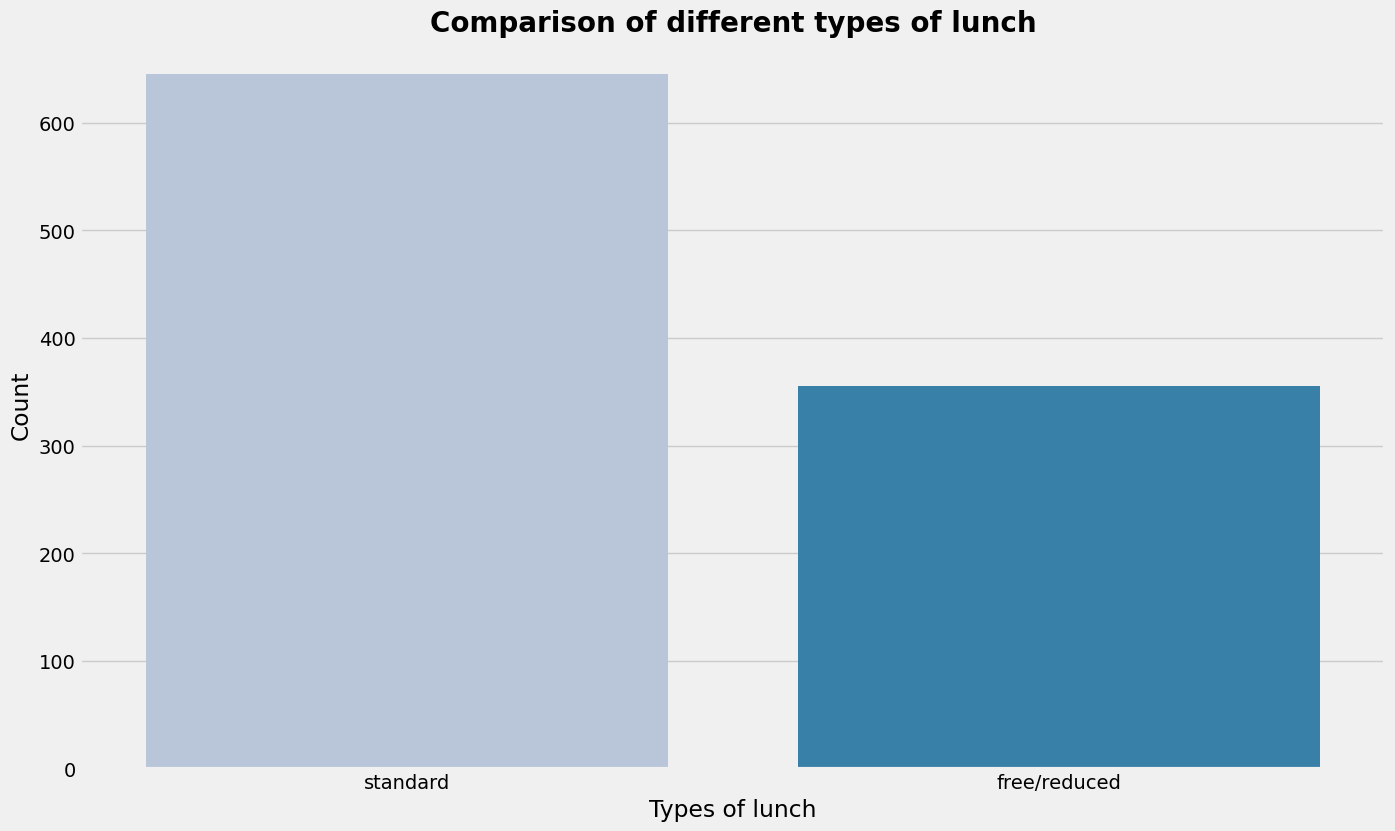

In [47]:
sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')


students has been served standard lunch than the free food

**BIVARIATE ANALYSIS**
effect of lunch type om students performace?

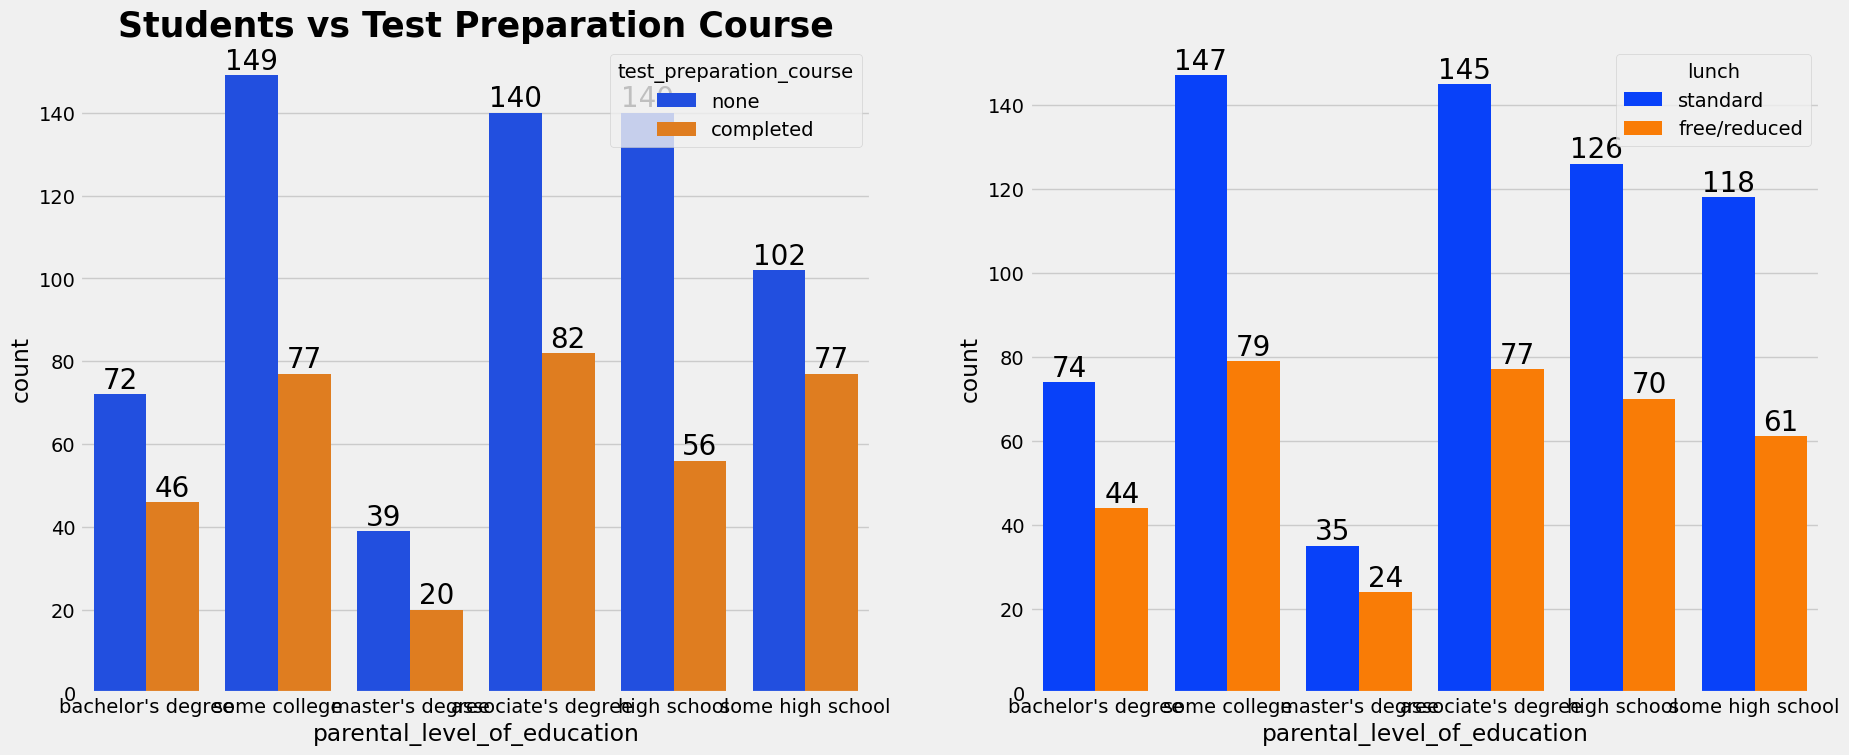

In [48]:
f, ax  = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(x='parental_level_of_education', data=df, ax=ax[0], palette='bright', hue='test_preparation_course')
ax[0].set_title('Students vs Test Preparation Course', color='black', fontsize=25, fontweight='bold')

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x='parental_level_of_education', data=df, ax=ax[1], palette='bright', hue='lunch', saturation=0.95)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()


* studnets who get standard lunch tend to perform better than students who got free lunch

**BIVARIATE ANALYSIS**

(IS THE TEST PREPARATION HAS ANY IMPACT ON STUDENTS PERFORMANCE?)

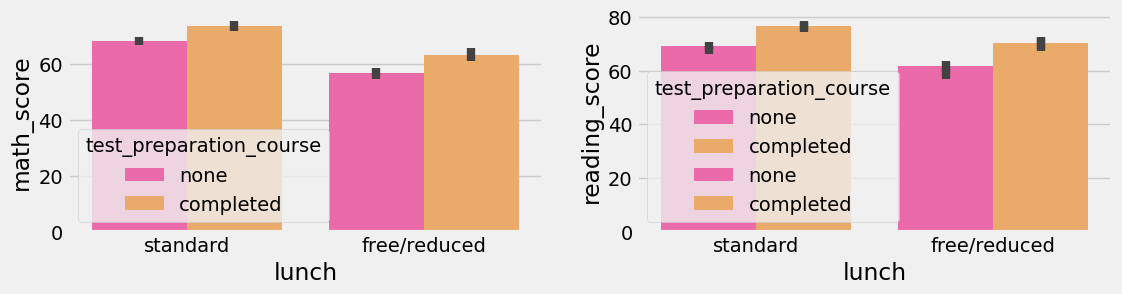

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x='lunch',y='math_score',data=df,palette='spring', hue = 'test_preparation_course')
plt.subplot(2,2,2)
sns.barplot(x='lunch',y='reading_score',data=df,palette='spring', hue = 'test_preparation_course')
plt.subplot(2,2,2)
sns.barplot(x='lunch',y='writing_score',data=df,palette='spring', hue = 'test_preparation_course')
plt.show()


* students who have completed the all the test preparation courses have scores than in all threee categories than who havent taken the course

**CHECKING OUTLIERS**

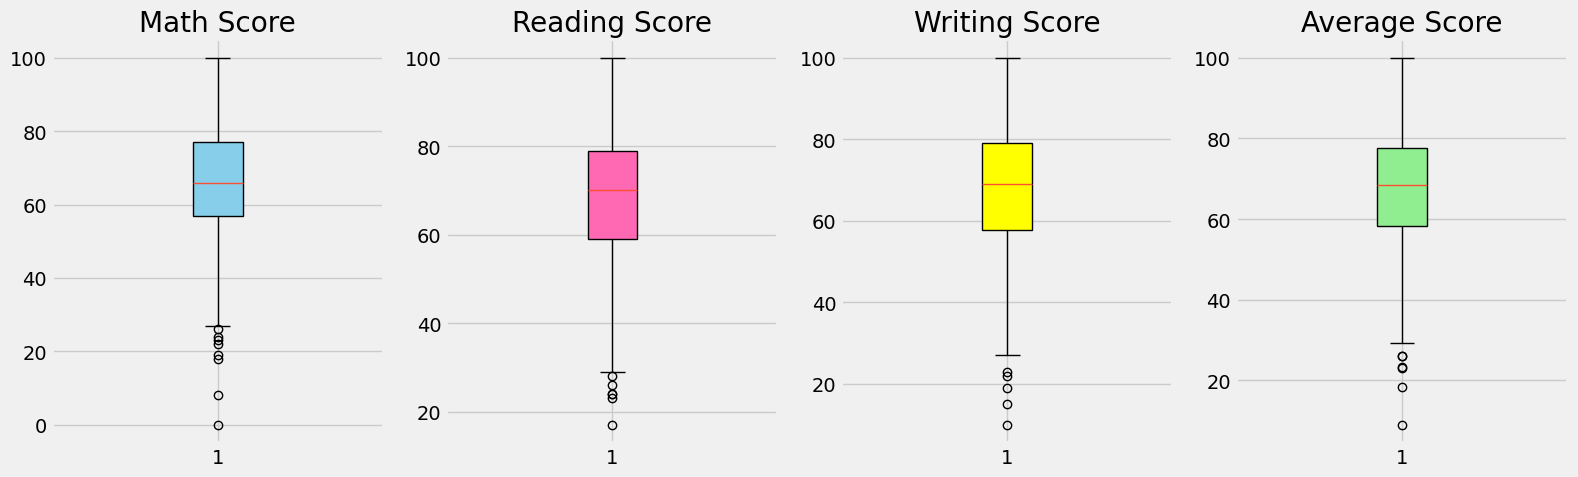

In [54]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].boxplot(df['math_score'], patch_artist=True,boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Math Score')

axes[1].boxplot(df['reading_score'], patch_artist=True, boxprops=dict(facecolor='hotpink'))
axes[1].set_title('Reading Score')

axes[2].boxplot(df['writing_score'], patch_artist=True, boxprops=dict(facecolor='yellow'))
axes[2].set_title('Writing Score')

axes[3].boxplot(df['average'], patch_artist=True,boxprops=dict(facecolor='lightgreen'))
axes[3].set_title('Average Score')

plt.tight_layout()
plt.show()


In [50]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<function matplotlib.pyplot.show(close=None, block=None)>

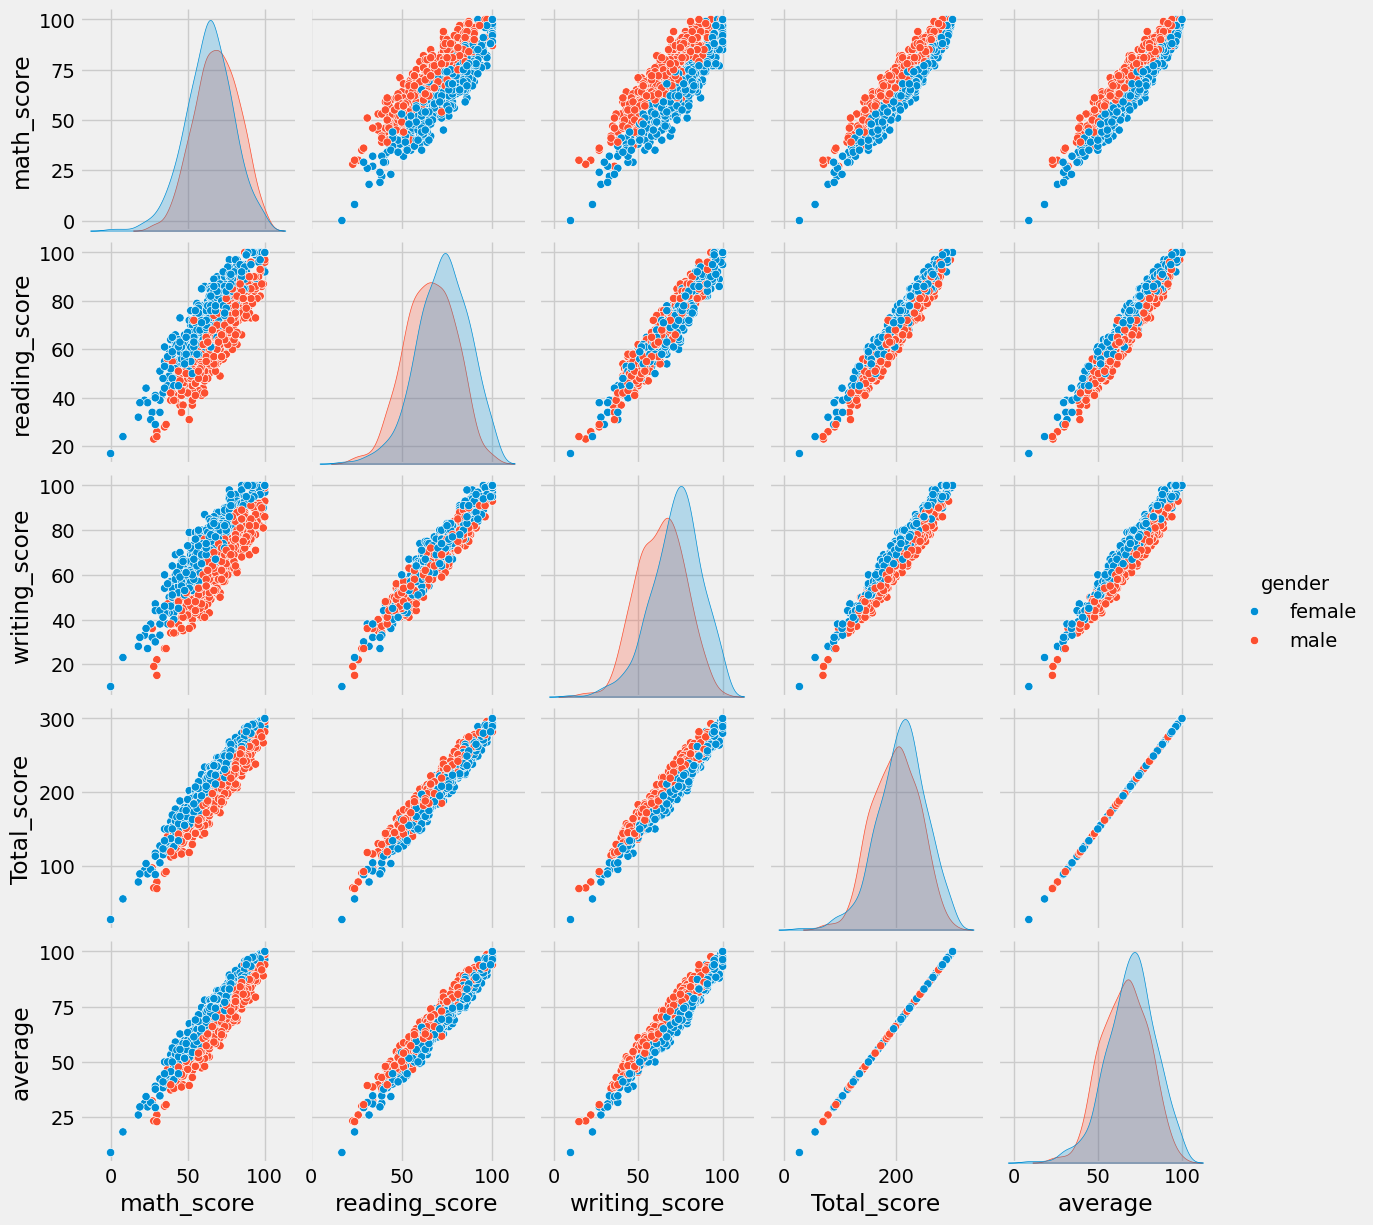

In [56]:
sns.pairplot(df,hue = 'gender')
plt.show

* from the above plot it is clear that all the scores increse linearly with each other

# **CONCLUSIONS**

* STUDENTS PERFORMANCE IS RELATED WITH TEH LUNCH , RACE, PARENTAL LEVEL EDUCATION

* FEMALES LEAD IN PASS PERCENTAGE AND ALSO ARE TOP-SCORERS

* STUDENTS PERFORMANCE IS NOT MUCH RELATED WITH TEST PREPARATION COURSE

* FINISHING THE PREPARATION COURSE IS BENEFITIAL.